<a href="https://colab.research.google.com/github/makhti/-selfeducation/blob/master/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_12_%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/8u5kJ-z9gUA?t=374

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=2017

In [ ]:
# Рисовать графики сразу же
%matplotlib inline

import re # регулярные выражения

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import datetime # Импортируем модуль datetime для обработки данных в формете даты
import numpy as np # Импортируем библиотеку numpy
from google.colab import files # Импортируем библиотеку files для работы с файлами

#База резюме headhunter

##Загружаем базу

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=2467

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fixed_df = pd.read_csv('/content/drive/My Drive/Базы/hh.csv')# Путь, куда вы скачали файл

##Содержимое базы

In [ ]:
fixed_df.head()

,Unnamed: 0,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последенее/нынешнее место работы,Последеняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,0,"Мужчина , 42 года , родился 6 октября 1976",27 000 руб.,Старший администратор,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 6 лет 1 месяц\n\nСтарший администр...,Трц Ривьера,Старший администратор по сохраности активов,Среднее специальное образование 1994 Спту 26,28.04.2019 12:17,Имеется собственный автомобиль
1,1,"Мужчина , 41 год , родился 14 января 1978",60 000 руб.,Старший IT инженер,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",Опыт работы 19 лет 2 месяца\n\nСтарший IT инже...,"Эскорт-Центр, Москва, ЗАО",Старший инженер сервисного центра,Высшее образование 1999 СОЧИНСКИЙ ГОС. УНИВЕР...,28.04.2019 11:44,Не указано
2,2,"Мужчина , 44 года , родился 21 февраля 1975",65 000 руб.,"Системный администратор, Системный инженер","Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",Опыт работы 19 лет 9 месяцев\n\nСистемный адми...,"СПССПК ""ЭКОПТИЦА""",Системный администратор,Высшее образование 2003 Московский государств...,28.04.2019 10:36,Не указано
3,3,"Мужчина , 43 года , родился 9 февраля 1976",70 000 руб.,"Web-программист, Web-администратор, Web-мастер","Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы 5 лет 9 месяцев\n\nWeb-программист...,"ГБУ ""МДОО""",специалист отдела интернет-проектов,Высшее образование 2002 Российский государств...,28.04.2019 10:29,Не указано
4,4,"Мужчина , 39 лет , родился 14 июня 1979",45 000 руб.,Старший системный администратор \ начальник от...,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",Опыт работы 13 лет 5 месяцев\n\nСтарший систем...,"ООО ""СервисСофт""",Старший системный администратор,Высшее образование 2007 Российский государств...,28.04.2019 10:15,Не указано


In [ ]:
# Количество резюме и критерии
print(fixed_df.shape)

(66945, 13)


In [ ]:
# Пример данных
n = 11 # Берем первое резюме
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", fixed_df.values[n][i])

0   11
1   Мужчина ,  29 лет , родился 19 июня 1989
2   50 000 руб.
3   Системный администратор
4   Симферополь , не готов к переезду , готов к редким командировкам
5    частичная занятость, полная занятость
6    удаленная работа, гибкий график, полный день, сменный график
7   Опыт работы 10 лет 2 месяца

Системный администратор 50 000 руб. Информационные технологии, интернет, телеком Системная интеграция Системный администратор Сотовые, Беспроводные технологии Занятость: частичная занятость, полная занятость График работы: удаленная работа, гибкий график, полный день, сменный график Опыт работы 10 лет 2 месяца Апрель 2015 — по настоящее время 4 года 1 месяц Ломбард Крым Капитал Симферополь , crimcapital.ru Финансовый сектор ... Финансово-кредитное посредничество (биржа, брокерская деятельность, выпуск и обслуживание карт, оценка рисков, обменные пункты, агентства по кредитованию, инкассация, ломбард, платежные системы) Системный администратор • Организация и обеспечение бесперебойного

In [ ]:
##############################################
####Убрать кодировку в описаниях \xa0 \n
##############################################
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с продублированными индексами. Он нам не нужен

i=0
for j in range(12):  # Для каждого из столбцов таблицы
    for i in range(fixed_df.shape[0]): # По всем резюме
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ")


In [ ]:
# Пример данных
n = 11 # Берем первое резюме
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", fixed_df.values[n][i])

0   Мужчина ,  29лет , родился 19 июня 1989
1   50000 руб.
2   Системный администратор
3   Симферополь , не готов к переезду , готов к редким командировкам
4    частичная занятость, полная занятость
5    удаленная работа, гибкий график, полный день, сменный график
6   Опыт работы 10 лет 2 месяца  Системный администратор 50000 руб. Информационные технологии, интернет, телеком Системная интеграция Системный администратор Сотовые, Беспроводные технологии Занятость: частичная занятость, полная занятость График работы: удаленная работа, гибкий график, полный день, сменный график Опыт работы 10 лет 2 месяца Апрель2015 — понастоящеевремя 4 года 1 месяц Ломбард Крым Капитал Симферополь , crimcapital.ru Финансовый сектор ... Финансово-кредитное посредничество (биржа, брокерская деятельность, выпуск и обслуживание карт, оценка рисков, обменные пункты, агентства по кредитованию, инкассация, ломбард, платежные системы) Системный администратор • Организация и обеспечение бесперебойного функциониров

##Парсим базу

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=3253

Версия для хранения

In [ ]:
# Данные о поле и возрасте
def getParameterSexAge(arg):
  out = 0
  #Если М, то 1. По умолчанию 0 - Ж
  if "Муж" in arg:
    sex='М'
  elif "Жен" in arg:
    sex = 'Ж'
  else:
    sex = "Не указан"
  # текущий год - год рождения
  year_tec = 2020
  if (len(arg) > 7):
    out = year_tec - int(re.findall(r'\d{4}', arg)[0])

  return sex, str(out)

# Зарплата
def getParameterSalary(arg):
    global salaryStr, num #т.к. используем, меняем в функции
    # Сначала получаем чистое число, убираем лишние знаки
    salaryStr = 0
    arg=str(arg)  
    salaryStr = int(re.sub(r'[^0-9]+', '', arg))
    curr_ = re.sub('[0-9]','',arg).replace('.','')

    # Конвертируем в рубли, если валюта
    if 'USD' in curr_ :   salaryStr = float(salaryStr)*75
    elif 'KZT' in curr_:  salaryStr = float(salaryStr)*0.17
    elif 'грн' in curr_:  salaryStr = float(salaryStr)*2.6
    num =salaryStr 
    return salaryStr


# Данные о городе
def getParameterCity(arg):
  millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград Сочи"
  sarg=arg.split(',')
  item = sarg[0] # Берем только город
  item= item.strip() # Удаляем пробелы
  if item == "Москва":          return "Москва"
  if item == "Санкт-Петербург": return "Санкт-Петербург"
  if item in millionCities:     return item
  else: return "малый или за пределами России город"

# Данные о желаемой занятости
def getParameterEmployment(arg):
  result = ''
  if ("стажировка" in arg)|("volunteer" in arg)|("work placement" in arg): result += 'стажировка '
  if ("частичная занятость" in arg)|("part" in arg):  result += 'частичная занятость '
  if ("проектная работа" in arg)|("project" in arg):  result += 'проектная работа '
  if ("полная занятость" in arg)|("full" in arg):     result += 'полная занятость'
  if result=='':
    result='Не указано'
  return result

# Данные о желаемом графике работы
def getParameterSchedule(arg):
  result = ''
  if ("гибкий график" in arg)|("flexible" in arg):    result += 'гибкий график '
  if ("полный день" in arg)|("full" in arg):     result += 'полный день '
  if ("сменный график" in arg)|("shift" in arg):   result += 'сменный график '
  if ("удаленная работа" in arg)|("remote" in arg): result += 'удаленная работа'
  if result=='':
    result='Не указано'
  return result

# Данные об образовании
def getParameterEducation(arg):
  result = ''
  arg = arg.lower()
  if ("высшее" in arg)|("higher education"  in arg): result += 'высшее '
  if ("среднее специальное"  in arg) | ("special"  in arg) | ("колледж"  in arg) | ("college"  in arg) : result += 'среднее специальное '
  if ("неоконченное высшее"  in arg) | ("incomplete"  in arg): result += 'неоконченное высшее '
  if ("среднее образование"  in arg) | ("secondary education"  in arg): result += 'среднее образование'
  if result=='':
    result='Не указано'
  return result

# Данные об опыте работы
def getParameterExperience(arg):
  sarg=arg.split(" ", 5)
  years = 0
  months = 0
  if len(sarg)!=6: sarg.append(0);sarg.append('');sarg.append(0);sarg.append('')
  try:
    #print(sarg)
    years = int(sarg[2])
  except ValueError:
    years = 0

  try:
    months = int(sarg[4])
  except ValueError:
    months = 0
  return 12*years+months

In [ ]:
fixed_df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последенее/нынешнее место работы,Последеняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 42года , родился 6 октября 1976",27000 руб.,Старший администратор,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 6 лет 1 месяц Старший администрат...,Трц Ривьера,Старший администратор по сохраности активов,Среднее специальное образование 1994 Спту 26,28.04.2019 12:17,Имеется собственный автомобиль
1,"Мужчина , 41год , родился 14 января 1978",60000 руб.,Старший IT инженер,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",Опыт работы 19 лет 2 месяца Старший IT инжене...,"Эскорт-Центр, Москва, ЗАО",Старший инженер сервисного центра,Высшее образование 1999 СОЧИНСКИЙ ГОС. УНИВЕР...,28.04.2019 11:44,Не указано
2,"Мужчина , 44года , родился 21 февраля 1975",65000 руб.,"Системный администратор, Системный инженер","Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",Опыт работы 19 лет 9 месяцев Системный админи...,"СПССПК ""ЭКОПТИЦА""",Системный администратор,Высшее образование 2003 Московский государств...,28.04.2019 10:36,Не указано
3,"Мужчина , 43года , родился 9 февраля 1976",70000 руб.,"Web-программист, Web-администратор, Web-мастер","Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день","Опыт работы 5 лет 9 месяцев Web-программист, ...","ГБУ ""МДОО""",специалист отдела интернет-проектов,Высшее образование 2002 Российский государств...,28.04.2019 10:29,Не указано
4,"Мужчина , 39лет , родился 14 июня 1979",45000 руб.,Старший системный администратор \ начальник от...,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",Опыт работы 13 лет 5 месяцев Старший системны...,"ООО ""СервисСофт""",Старший системный администратор,Высшее образование 2007 Российский государств...,28.04.2019 10:15,Не указано


In [ ]:
df = fixed_df.drop(fixed_df.columns[[2,7,8,10,11]],axis=1 ) # удаляем неинтересующие нас столбцы

In [ ]:
df.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ
0,"Мужчина , 42года , родился 6 октября 1976",27000 руб.,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 6 лет 1 месяц Старший администрат...,Среднее специальное образование 1994 Спту 26
1,"Мужчина , 41год , родился 14 января 1978",60000 руб.,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",Опыт работы 19 лет 2 месяца Старший IT инжене...,Высшее образование 1999 СОЧИНСКИЙ ГОС. УНИВЕР...
2,"Мужчина , 44года , родился 21 февраля 1975",65000 руб.,"Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",Опыт работы 19 лет 9 месяцев Системный админи...,Высшее образование 2003 Московский государств...
3,"Мужчина , 43года , родился 9 февраля 1976",70000 руб.,"Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день","Опыт работы 5 лет 9 месяцев Web-программист, ...",Высшее образование 2002 Российский государств...
4,"Мужчина , 39лет , родился 14 июня 1979",45000 руб.,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",Опыт работы 13 лет 5 месяцев Старший системны...,Высшее образование 2007 Российский государств...


In [ ]:
# Создаем список в которых лежат объекты наших функций
funcList = [getParameterSexAge,getParameterSalary, getParameterCity,getParameterEmployment,getParameterSchedule,getParameterExperience,getParameterEducation]

# Проходимся по каждой колонке и применяем к каждой из колонок соответствующую функцию
for i in range(len(df.columns)):
  df[df.columns[i]] =[ funcList[i](cell) for cell in df[df.columns[i]]]


In [ ]:
df.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ
0,"(М, 44)",27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное
1,"(М, 42)",60000.0,Сочи,частичная занятость полная занятость,гибкий график полный день,230,высшее
2,"(М, 45)",65000.0,малый или за пределами России город,полная занятость,полный день удаленная работа,237,высшее
3,"(М, 44)",70000.0,Москва,полная занятость,гибкий график полный день удаленная работа,69,высшее
4,"(М, 41)",45000.0,малый или за пределами России город,частичная занятость полная занятость,полный день сменный график,161,высшее


In [ ]:
df.insert(0,'Пол', np.array([df['Пол, возраст'][i][0] for i in range(len(df))]))          # Создаем отдельную колонку под Пол 
df.insert(1,'Возраст', np.array([int(df['Пол, возраст'][i][1]) for i in range(len(df))])) # Создаем отдельную колонку под Возраст
df.drop('Пол, возраст', axis = 1, inplace = True)                                    # Убираем лишнюю колонку, сочетающую в себе эти два признака

In [ ]:
df.head()

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное
1,М,42,60000.0,Сочи,частичная занятость полная занятость,гибкий график полный день,230,высшее
2,М,45,65000.0,малый или за пределами России город,полная занятость,полный день удаленная работа,237,высшее
3,М,44,70000.0,Москва,полная занятость,гибкий график полный день удаленная работа,69,высшее
4,М,41,45000.0,малый или за пределами России город,частичная занятость полная занятость,полный день сменный график,161,высшее


In [ ]:
df.to_csv('/content/drive/My Drive/Базы/hh_parsed.csv', index=False)  # Сохраняем распаршенную базу

# Корзины интернет-магазина

##Загружаем базу

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=6282

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Базы/online_carts.csv') # Читаем данные из загруженной базы

In [ ]:
df.head(40)

,Unnamed: 0,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Период: Февраль 2019 г. - Август 2019 г.,NaN,NaN,NaN
1,NaN,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),NaN,NaN
2,NaN,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),NaN
3,NaN,Отборы:\nПодразделение В списке (estel.m-cosme...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,ЗаказПокупателя.Дата оправки,Стоимость продажи (руб.),Количество,NaN
6,NaN,ЗаказПокупателя.ID заказа,С НДС,Базовых ед.,NaN
7,NaN,Номенклатура.Наименование,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,01.01.2019 0:00:00,26236,9,NaN


##Чистка

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=6424

In [ ]:
# Посмотрим на уникальные значения каждого из безымянных столбцов
print(df['Unnamed: 0'].unique(),
      df['Unnamed: 2'].unique(),
      df['Unnamed: 3'].unique(),
      df['Unnamed: 4'].unique(), sep='\n')

[nan]
[nan ' Количество(Базовых ед.)' ' ЗаказПокупателя.ID заказа (Элементы)'
 ... '3472' '7616' '2731']
[nan ' Номенклатура.Наименование (Элементы)' 'Количество' 'Базовых ед.'
 '9' '1' '4' '797' '162' '3' '2' '5' '7' '8' '6' '49' '10' '34' '11' '25'
 '20' '13' '17' '29' '1130' '148' '12' '40' '14' '50' '68' '51' '23' '22'
 '16' '1096' '105' '124' '139' '19' '15' '26' '30' '21' '504' '28' '575'
 '60' '61' '18' '80' '942' '44' '188' '24' '1375' '147' '137' '33' '597'
 '82' '37' '860' '47' '825' '27' '45' '229' '887' '113' '58' '104' '38'
 '1751' '134' '138' '1214' '341' '168' '81' '88' '1074' '150' '32' '52'
 '43' '1023' '64' '72' '31' '39' '1237' '254' '46' '289' '1938' '456'
 '132' '2689' '599' '1771' '181' '322' '77' '556' '90' '256' '42' '57'
 '35' '883' '118' '1078' '145' '2749' '36' '1360' '85' '893' '214' '692'
 '119' '1533' '239' '650' '93' '70' '1551' '158' '78' '102' '780' '291'
 '41' '1278' '140' '48' '161' '1127' '122' '94' '978' '98' '769' '92'
 '159' '720' '69' '56' '1648'

In [ ]:
new = df.drop(['Unnamed: 0', 'Unnamed: 4'], axis =1)
new.insert(0, column='Дата', value = [x for x in range(len(new))]) # Вставим новую колонку "Дата", чтобы из базы вытащить временные данные в отдельную колонку
new = new.fillna('unknown')                                        # Все Nan заполним строкой "unknown", чтобы не выскакивало ошибок

In [ ]:
new.head(30)

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3
0,0,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown
1,1,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),unknown
2,2,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы)
3,3,Отборы:\nПодразделение В списке (estel.m-cosme...,unknown,unknown
4,4,unknown,unknown,unknown
5,5,ЗаказПокупателя.Дата оправки,Стоимость продажи (руб.),Количество
6,6,ЗаказПокупателя.ID заказа,С НДС,Базовых ед.
7,7,Номенклатура.Наименование,unknown,unknown
8,8,unknown,unknown,unknown
9,9,01.01.2019 0:00:00,26236,9


In [ ]:
new[new['Валовая прибыль'].str.contains("CAFRE")] # CAFRE - флаг начала корзины

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3
130,130,CAFRE3100,8593,49
812,812,CAFRE3107,6421,7
1764,1764,CAFRE3102,3650,6
2644,2644,CAFRE3097,1612,4
2648,2648,CAFRE3108,7119,15
...,...,...,...,...
92902,92902,CAFRE3246,3478,6
92907,92907,CAFRE3247,9946,43
93617,93617,CAFRE3248,1309,3
96725,96725,CAFRE3254,1634,8


In [ ]:
new[new['Валовая прибыль'].str.contains("MCOSM")] # MCOSM - флаг начала корзины

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3
10,10,MCOSM13113,26236,9
22,22,MCOSM13113,1929,4
166,166,MCOSM4885,350,2
168,168,MCOSM4996,9436,4
172,172,MCOSM5963,8625,6
...,...,...,...,...
99589,99589,MCOSM33527,2714,6
99596,99596,MCOSM33529,3145,9
99603,99603,MCOSM33530,3030,12
99616,99616,MCOSM33537,2259,2


##Разобьем по датам покупки

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=6691

In [ ]:
date_list = list(new[new['Валовая прибыль'].str.contains("\d\d.\d\d.2019")].index) # Здесь будут лежать все индексы строк, где есть информация в формате даты

In [ ]:
indx=0
for i in range(len(new)):                       # Проходимся по каждой строке базы
  if i in date_list:                            # Если индекс находится среди тех, где есть формат даты
    indx = i                                    # Обновляем текущий индекс
  new['Дата'][i] = new['Валовая прибыль'][indx] # Присваиваем текущий индекс всем последующим строкам, пока не наткнемся на новый индекс-дату


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
new = new.drop(new[new['Дата'].str.contains('Период')].index,axis = 0)           # Выкинем превьюшные строки
new = new.drop(new[new['Валовая прибыль'].str.contains('unknown')].index,axis=0) # Выкинем пустые строки между корзинами
new = new.drop(new[new['Валовая прибыль']==new['Дата']].index)                   # Выкинем строки-даты, которые находятся в столбце корзин
new.reset_index(inplace=True)                                                    # Обновим индекс
new = new.drop('index',axis=1)                                                   # Выкинем ненужную, образовавшуюся после предыдущей операции, колонку

In [ ]:
new.rename(columns={'Валовая прибыль': 'Наименование товара', 'Unnamed: 2': 'Цена', 'Unnamed: 3': 'Количество товара'}, inplace=True) # Переименовываем столбцы

In [ ]:
new.head(40)

,Дата,Наименование товара,Цена,Количество товара
0,01.01.2019 0:00:00,MCOSM13113,26236,9
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1
5,01.01.2019 0:00:00,XPERT (HS71) машинка для стрижки волос,12989,1
6,01.01.2019 0:00:00,ЛП ТНА САВАЖ ПАНАШ 250 мл,988,1
7,01.01.2019 0:00:00,перчатки (50 пар) винил размер S черные,319,1
8,01.01.2019 0:00:00,Услуга доставки DPD до двери,990,1
9,01.01.2019 0:00:00,Услуга доставки СДЭК,990,1


## Формируем корзины интернет магазина

*Разбор данного раздела:* https://youtu.be/8u5kJ-z9gUA?t=7265

In [ ]:
cart_list = list(new[new['Наименование товара'].str.contains("MCOSM")].index) + \
            list(new[new['Наименование товара'].str.contains("CAFRE")].index)        # Здесь будут лежать все индексы строк, где строка содержит флаг начала корзины
cart_list.sort() # сортируем список

In [ ]:
cart_list[:10]

[0, 10, 115, 151, 153, 157, 163, 172, 178, 182]

Взглянем на распаршенную базу

In [ ]:
new.head(20)

,Дата,Наименование товара,Цена,Количество товара
0,01.01.2019 0:00:00,MCOSM13113,26236,9
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1
5,01.01.2019 0:00:00,XPERT (HS71) машинка для стрижки волос,12989,1
6,01.01.2019 0:00:00,ЛП ТНА САВАЖ ПАНАШ 250 мл,988,1
7,01.01.2019 0:00:00,перчатки (50 пар) винил размер S черные,319,1
8,01.01.2019 0:00:00,Услуга доставки DPD до двери,990,1
9,01.01.2019 0:00:00,Услуга доставки СДЭК,990,1


In [ ]:
carts = []                     # Здесь будут лежать все корзины 
cart=[]                        # В этом списке будет текущая корзина
i=0                            # Счетчик для прохождения по базе
val = new['Наименование товара']   # Будем работать с этим столбцом
allPositions = []              # Создаем пустой список позиций

while i!=len(new):             # Пока не дойдем до конца списка

  if i in cart_list:           # Если счетчик в списке индексов-корзин

    if i!=cart_list[-1]:       # Проверяем, если это не последний индекс-флаг
      ind = cart_list.index(i) # Текущему индексу-флагу присваиваем значение конкретно этой корзины

      # Пробегаемся дальше по счетчику до момента, когда он не будет равен следующему в списке индексу-флагу
      # Если условия соблюдаются, то закидываем следующую строку в текущую корзину
      # Инкремент счетчика
      while i<cart_list[ind+1]-1:
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1 
      
    else:                      # Если же текущий индекс-флаг последний в списке

      # Пробегаемся дальше по счетчику до момента, когда он не будет равен концу списка всех строк в столбце-1
      # Если условия соблюдаются, то закидываем следующую строку в текущую корзину
      # Инкремент счетчика
      while i<(len(new)-1):
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1

    carts.append(cart)         # Закидываем корзину в список всех корзин
    cart=[]                    # Очищаем корзину
    
  else:
    i+=1                       # Если счетчик не в списке корзин, то инкрементируем
 


In [ ]:
print(len(carts)==len(cart_list))   # Проверка, если у нас количество корзин совпадает с количеством флагов корзин
print('Количество всех позиций: ', len(allPositions)) 
print('Пример того, что лежит в корзине: ', carts[70])
print('Количество корзин:', len(carts))

True
Количество всех позиций:  85543
Пример того, что лежит в корзине:  ['DGP Жидкое лезвие пенный экспресс размягчитель 200 мл', 'Kapous Бальзам для окрашенных волос 1 л', 'Kapous Диспенсер с плунжером в сборе для ёмкостей 1000 мл', 'Kapous Шампунь для окрашенных волос 1 л', 'Маска д/волос с маслом ореха макадамии серии Macadamia Oil 500 мл', 'Услуга доставки DPD до двери']
Количество корзин: 13641


In [ ]:
for i in range(10):
  print(carts[i])

['CONTURA (HS61) машинка для стрижки волос', 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл', 'Kapous Бальзам-уход для придания объема Volume up 350 мл', 'Kapous Шампунь для придания объема Volume up 350 мл', 'XPERT (HS71) машинка для стрижки волос', 'ЛП ТНА САВАЖ ПАНАШ 250 мл', 'перчатки (50 пар) винил размер S черные', 'Услуга доставки DPD до двери', 'Услуга доставки СДЭК']
['OLLIN SERVICE LINE Увлаж. Бальзам для волос 1000 мл', 'OLLIN SERVICE LINE Шампунь.-стабилизатор рН 3.5 1000 мл', 'Масло-уход для светлых волос  ESTEL PRIMA BLONDE 100 мл.', 'Услуга доставки Почта России', '/101 Крем-краска ESTEL PRINCESS ESSEX пепельный', '/44 Крем-краска ESTEL PRINCESS ESSEX медный', '0/00 Стойкая крем-краска чистый тон', '0/00N Крем-краска ESTEL PRINCESS ESSEX нейтральный', '0/11 Крем-краска ESTEL PRINCESS ESSEX синий', '0/22 Крем-краска ESTEL PRINCESS ESSEX зеленый', '0/33 Крем-краска ESTEL PRINCESS ESSEX желтый', '0/33 Стойкая крем-краска интенсивный золотистисты', '0/55 Крем-краска

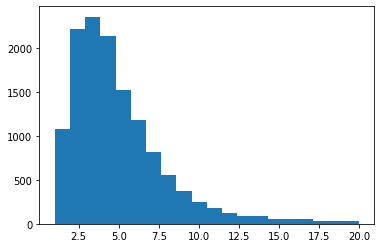

In [ ]:
# Отобразим гистограмму размеров корзин
plt.hist([len(c) for c in carts], 20, [1, 20])
plt.show()

In [ ]:
print(max([len(c) for c in carts]))

213


In [ ]:
np_allPositions = np.array(allPositions)
print(np_allPositions)

['CONTURA (HS61) машинка для стрижки волос'
 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл'
 'Kapous Бальзам-уход для придания объема Volume up 350 мл' ...
 'Услуга доставки DPD до двери'
 'Шампунь разглаживающий с   глиоксиловой кислотой серии "GlyoxySleek Hair" 500 мл'
 'Шампунь-архитектор волос для восстановления + питания (кератиновый ремонт волос) без сульф 1000 мл.']


In [ ]:
print(np.unique(np_allPositions).shape)
print(np.unique(np_allPositions))

(6589,)
['#2-8 | O prof.cehko Шампунь для жирной кожи головы, 200мл/Shampoo anti oil, 200 ml'
 '#3-5 prof.cehko Маска для усиления цвета, 200мл/Mask color power 200ml'
 '#3-6 prof.cehko Cпециальная маска для роскошного блонда, 150мл/Special mask posh blond 150ml'
 ...
 '№ 1 Био-перманент для нормальных волос,  с кондиционирующим эффектом 110+110 ml'
 '№ 2 Био-перманент для поврежденных, ослабленных  и осветленных  (окрашенных) волос 110+110 ml'
 '№ 3 Био-перманент для трудноподдающихся, непослушных волос 110+110 ml']
